In [1]:
""" Retrieve and load the mnist_784 dataset of 70,000 instances """

from sklearn.datasets import fetch_openml
import pandas as pd

mnist = fetch_openml('mnist_784')
dataset = pd.DataFrame(mnist.data)



In [2]:
""" Display each digit """
dataset


,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
""" Use PCA to retrieve the 1st and 2nd
principal component and output their explained variance ratio """

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
x_reduced = pca.fit_transform(dataset)
pca.explained_variance_ratio_

array([0.09746116, 0.07155445])

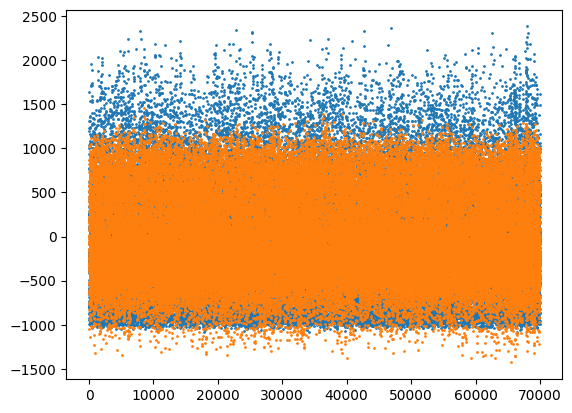

In [4]:
""" Plot the projections of the 1st and 2nd 
 principal component onto a 2D hyperplane """

from matplotlib import pyplot as plt
import numpy as np
plt.plot(x_reduced, 'o', markersize=1)

In [5]:
""" Use Incremental PCA to reduce the dimensionality of the MNIST dataset down to 154 dimensions """

from sklearn.decomposition import IncrementalPCA

n_batches = 100
ipca = IncrementalPCA(n_components=154)

for batch in np.array_split(dataset, n_batches):
    ipca.partial_fit(batch)
    
x_reduced_ipca = ipca.transform(dataset)

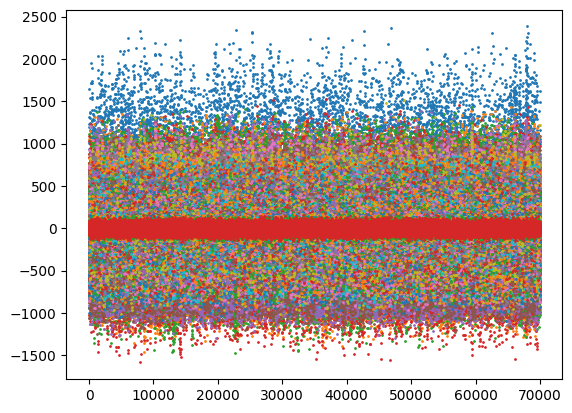

In [6]:
""" Display the original and compressed digits from """

plt.plot(x_reduced_ipca, 'o', markersize=1)

In [183]:
""" Generate Swiss roll dataset """

from sklearn.datasets import make_swiss_roll

tuple_swiss_roll = make_swiss_roll(n_samples=2500, random_state=75)

x = pd.DataFrame(tuple_swiss_roll[0])


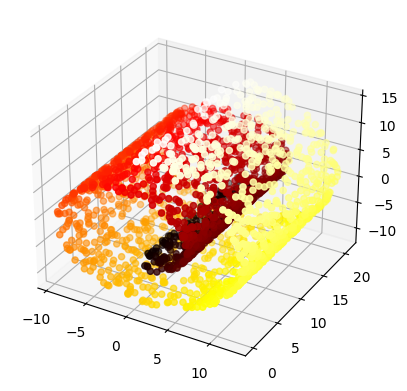

In [170]:
""" Plot the resulting generated Swiss roll dataset """

ax = plt.axes(projection='3d')
ax.scatter(x[0], x[1], x[2], c=tuple_swiss_roll[1], cmap=plt.cm.hot)

In [42]:
""" create 3 kernelPCAs for different kernels """

from sklearn.decomposition import KernelPCA

linear_kernel = KernelPCA(kernel='linear', n_components=2)
rbf_kernel = KernelPCA(kernel='rbf', n_components=2)
sigmoid_kernel = KernelPCA(kernel='sigmoid', n_components=2)



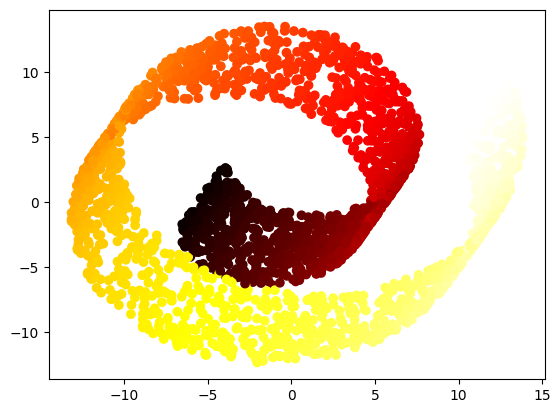

In [171]:
""" Use and plot Kernel PCA (kPCA) with linear kernel """
linear_reduced = linear_kernel.fit_transform(x)
plt.scatter(linear_reduced[:,0], linear_reduced[:,1], c=tuple_swiss_roll[1], cmap=plt.cm.hot)



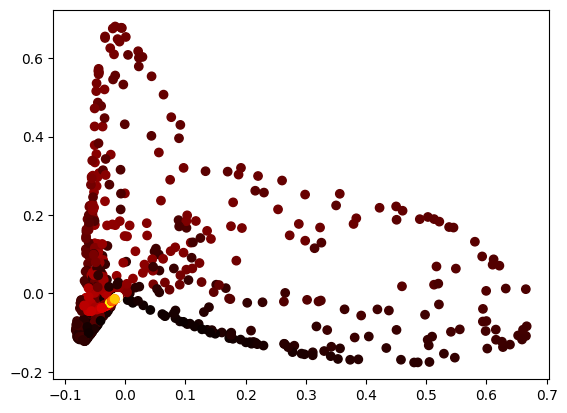

In [173]:
""" Use and plot Kernel PCA (kPCA) with rbf kernel """

rbf_reduced = rbf_kernel.fit_transform(x)
plt.scatter(rbf_reduced[:,0], rbf_reduced[:,1], c=tuple_swiss_roll[1], cmap=plt.cm.hot)


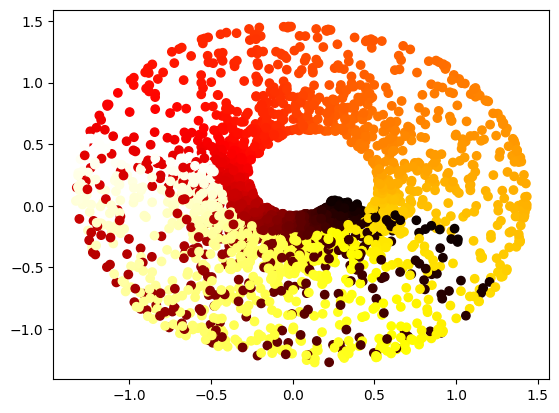

In [174]:
""" Use and plot Kernel PCA (kPCA) with sigmoid kernel """

sigmoid_reduced = sigmoid_kernel.fit_transform(x)
plt.scatter(sigmoid_reduced[:,0], sigmoid_reduced[:,1], c=tuple_swiss_roll[1], cmap=plt.cm.hot)


In [187]:
""" Using kPCA and a kernel of your choice, apply Logistic Regression for classification. 
Use GridSearchCV to find the best kernel and gamma value for kPCA in order to get the best 
classification accuracy at the end of the pipeline. Print out best parameters found by GridSearchCV """

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder

clf = Pipeline([
    ('kpca', KernelPCA(n_components=2)),
    ('log_reg', LogisticRegression())
])

param_grid = [{
    'kpca__gamma': np.linspace(0.03, 0.05, 10),
    'kpca__kernel': ['rbf', 'sigmoid', 'linear']
}]

y = pd.DataFrame(tuple_swiss_roll[1])
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

xtrain, xtest, ytrain, ytest = train_test_split(x, y_encoded, test_size=0.2)


grid_search = GridSearchCV(clf, param_grid, cv=3)
grid_search.fit(xtrain, ytrain)



c:\Users\ari-c\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: n_splits=3 cannot be greater than the number of members in each class.